#  Bidhaa Sasa Kenya

##  1. Defining the question 

> Bidhaa Sasa is a women-focused start-up that uniquely combines financing and last-mile distribution of modern household goods in a one-stop shop for the rural areas. The start-up strives to make technology goods accessible and affordable by offering consumer financing to the under-served and unbanked. The products are delivered to clients’ doorsteps while making all products payable in affordable instalments and with mobile money. The products are sold through groups that are recruited and managed by women leaders in the rural heartlands of Kenya.

> Bidhaa Sasa wishes to increase sales of its products by ensuring that they prospect for new clients while at the same time ensuring that the existing clients pick up a new product. The start-up further wishes to ensure that all prospective clients are able to finance their purchases. Our Team has been invited to analyse and advise the sales team on how this can be achieved.



### a) Specifying the question 


We would like to identify which products move faster and move bigger volumes without being defaulted 


### b) Defining the metric for success

The metric for success would be to identify the product that moves the fastest, the most and is defaulted the least. 

### c) Understanding the context 



    > Bidhaa Sasa is a women-focused start-up that uniquely combines financing and last-mile distribution of modern household goods in a one-stop shop for the rural areas. The start-up strives to make technology goods accessible and affordable by offering consumer financing to the under-served and unbanked. The products are delivered to clients’ doorsteps while making all products payable in affordable instalments and with mobile money. The products are sold through groups that are recruited and managed by women leaders in the rural heartlands of Kenya.

    > Bidhaa Sasa wishes to increase sales of its products by ensuring that they prospect for new clients while at the same time ensuring that the existing clients pick up a new product. The start-up further wishes to ensure that all prospective clients are able to finance their purchases. Our Team has been invited to analyse and advise the sales team on how this can be achieved.


### d) Recording the experimental design 

The following are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:
* Load data and preview preliminary characteristics of the dataset
* Data cleaning (check for and deal with outliers, anomalies and missing data)
* Perform univariate, bivariate and multivariate analysis
* Specify the null and alternate hypotheses
* Sampling
* Perform hypothesis testing
* Discuss the hypothesis test results
* Prediction modelling
* Project summary and conclusion



### e) Data Relevance 

The dataset used in this analysis was obtained from Bidhaa Sasa website. The available data contains sales records from January 2019 through March 2020. The full dataset has 29 unique attributes and 31,516 records. 

https://docs.google.com/spreadsheets/d/1iNfuNRcljoR6ziMPxno4AYKSx8yIo8jKlLRuRrGt9zE/edit#gid=1171267039
link to the data 

## 2. Reading and checking the data set 

In [35]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import datetime
from scipy import stats

In [4]:
# Loading and previewing the data
df = pd.read_csv('Bidhaaoutput.csv',na_values='missing_values')
df.head(5)

,Unnamed: 0,Client ID,Client name,DOB,ID Card,Gender,Account,Branch,Product,Loan Principal,Interest,Down Payment,Total amount,Principal,Interest.1,Fees,Total,Prepayment,Loan Officer,Cycle,Disbursed Date,Installments,Loan Frequency,Loan Frequency 2,Status,TRP,Group ID,Final Payment Date,Arrear Amount,Days in Arrears
0,0,0008-0056-17323,NaN,1/1/1965,NaN,Female,18876,Vihiga,BORA,"4,900.00",0,700,"5,600.00",0,0,0,0,0,Anthony,1.0,1/9/2019,7,1,Monthly,Closed,71.40%,17073,8/3/2019,0,NaN
1,1,0008-0056-17324,NaN,5/15/1953,NaN,Female,18877,Vihiga,BORA,"4,900.00",0,700,"5,600.00",0,0,0,0,0,Anthony,1.0,1/9/2019,7,1,Monthly,Closed,100%,17073,3/12/2019,0,NaN
2,2,0008-0056-17326,NaN,1/1/1954,NaN,Female,18879,Vihiga,BORA,"4,900.00",0,700,"5,600.00",0,0,0,0,0,Anthony,1.0,1/9/2019,7,1,Monthly,Closed,14.30%,17073,8/8/2019,0,NaN
3,3,0008-0056-17327,NaN,12/30/1986,NaN,Female,18880,Vihiga,BORA,"4,900.00",0,700,"5,600.00",0,0,0,0,0,Anthony,1.0,1/9/2019,7,1,Monthly,Closed,14.30%,17073,8/8/2019,0,NaN
4,4,0008-0056-17328,NaN,1/2/1978,NaN,Male,18881,Vihiga,BORA,"4,900.00",0,700,"5,600.00",0,0,0,0,0,Anthony,1.0,1/9/2019,7,1,Monthly,Closed,100%,17073,8/1/2019,0,NaN


In [5]:
# Dataset shape
df.shape

(31516, 30)

In [6]:
# General information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31516 entries, 0 to 31515
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          31516 non-null  int64  
 1   Client ID           31516 non-null  object 
 2   Client name         0 non-null      float64
 3   DOB                 31502 non-null  object 
 4   ID Card             6665 non-null   object 
 5   Gender              31516 non-null  object 
 6   Account             31516 non-null  int64  
 7   Branch              31516 non-null  object 
 8   Product             31516 non-null  object 
 9   Loan Principal      31516 non-null  object 
 10  Interest            31516 non-null  int64  
 11  Down Payment        31516 non-null  object 
 12  Total amount        31516 non-null  object 
 13  Principal           31516 non-null  object 
 14  Interest.1          31516 non-null  int64  
 15  Fees                31516 non-null  int64  
 16  Tota

## 3. Cleaning the data

In [7]:
# Replacing whitespace with underscore in column names
df.columns = df.columns.str.replace(' ','_')

# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

# Viewing the column names
df.columns

Index(['unnamed:_0', 'client_id', 'client_name', 'dob', 'id_card', 'gender',
       'account', 'branch', 'product', 'loan_principal', 'interest',
       'down_payment', 'total_amount', 'principal', 'interest.1', 'fees',
       'total_', 'prepayment', 'loan_officer', 'cycle', 'disbursed_date',
       'installments', 'loan_frequency', 'loan_frequency_2', 'status', 'trp',
       'group_id', 'final_payment_date', 'arrear_amount', 'days_in_arrears'],
      dtype='object')

In [8]:
# Dropping unnecessary columns

df = df.drop(['unnamed:_0', 'client_id', 'client_name', 'days_in_arrears'], axis=1)
df.columns

Index(['dob', 'id_card', 'gender', 'account', 'branch', 'product',
       'loan_principal', 'interest', 'down_payment', 'total_amount',
       'principal', 'interest.1', 'fees', 'total_', 'prepayment',
       'loan_officer', 'cycle', 'disbursed_date', 'installments',
       'loan_frequency', 'loan_frequency_2', 'status', 'trp', 'group_id',
       'final_payment_date', 'arrear_amount'],
      dtype='object')

In [9]:
# Inspecting the unique elements for each column
cols = df.columns

for col in cols:
  print(col.upper())
  print(df[col].unique())

DOB
['1/1/1965' '5/15/1953' '1/1/1954' ... '9/3/1986' '1/8/1995' '5/26/1991']
ID_CARD
[nan '36515632' '337434664' ... '26664037' '31193142' '29676279']
GENDER
['Female' 'Male']
ACCOUNT
[18876 18877 18879 ... 50993 50994 50995]
BRANCH
['Vihiga' 'Siaya' "Moi's Bridge" 'Webuye' 'Mumias' 'Kapsabet' 'Bomet']
PRODUCT
['BORA' 'LPG2' 'BOOM' 'P400' 'SKH+' 'COOK' 'TANK' 'GASC' 'HOME' 'LPG3'
 'B00M' 'CNVS' 'JIKO' 'MRKT' 'SILO' 'TNK' 'PRO4' 'SPRA' 'SLO2' 'CVS2'
 'KUNI' 'EPC']
LOAN_PRINCIPAL
['4,900.00' '4,800.00' '4,200.00' '2,800.00' '9,600.00' '12,000.00'
 '5,400.00' '10,800.00' '4,500.00' '2,100.00' '12,600.00' '3,000.00'
 '7,200.00' '3,500.00' '4,000.00' '3,600.00' '13,500.00']
INTEREST
[0]
DOWN_PAYMENT
['700' '1,200.00' '2,000.00' '900' '500' '1,800.00' '600']
TOTAL_AMOUNT
['5,600.00' '6,000.00' '4,900.00' '3,500.00' '10,800.00' '14,000.00'
 '6,300.00' '11,700.00' '5,000.00' '5,900.00' '2,800.00' '14,400.00'
 '8,400.00' '4,200.00' '4,500.00' '5,400.00' '3,600.00' '4,800.00'
 '8,100.00' '15,30

In [10]:
# Further Dropping of columns
df = df.drop(['id_card', 'interest', 'interest.1', 'fees', 'loan_frequency', 'loan_frequency_2'], axis=1)
df.columns

Index(['dob', 'gender', 'account', 'branch', 'product', 'loan_principal',
       'down_payment', 'total_amount', 'principal', 'total_', 'prepayment',
       'loan_officer', 'cycle', 'disbursed_date', 'installments', 'status',
       'trp', 'group_id', 'final_payment_date', 'arrear_amount'],
      dtype='object')

In [11]:
# change dates to datetime
df['disbursed_date'] = pd.to_datetime(df['disbursed_date'])

df['dob'] = pd.to_datetime(df['dob'])

df['final_payment_date'] = pd.to_datetime(df['final_payment_date'])

In [12]:
# Creating column 'age_at_disbursement'
df['age_at_disbursement'] = pd.DatetimeIndex(df['disbursed_date']).year - pd.DatetimeIndex(df['dob']).year

In [13]:
# Previewing the unique entries of the new column
df['age_at_disbursement'].unique()

array([54., 66., 65., 33., 41., 37., 73., 30., 22., 43., 57., 63., 46.,
       42., 44., 47., 36., 35., 28., 23., 34., 60., 49., 27., 39., 31.,
       32., 29., 67., 20., 26., 55., 77., 56., 40., 38., 45., 19., 58.,
       62., 69., 59., 21., 48., 25., 24., 71., 53., 51., 50., 95., 52.,
       64., 61., 75., 70., 81., 18., 76., 68., 79., 80., 74., 85., 72.,
       87., 88., 89., 84., 83., nan, 90., 78., 82., 86., 92., 91., 98.])

In [14]:
df.columns

Index(['dob', 'gender', 'account', 'branch', 'product', 'loan_principal',
       'down_payment', 'total_amount', 'principal', 'total_', 'prepayment',
       'loan_officer', 'cycle', 'disbursed_date', 'installments', 'status',
       'trp', 'group_id', 'final_payment_date', 'arrear_amount',
       'age_at_disbursement'],
      dtype='object')

In [24]:
# Removing the commas in the  monetary columns
mon_cols = ['loan_principal','down_payment','total_amount','prepayment']

for mon_col in mon_cols:
  df[mon_col] = df[mon_col].apply(lambda x : x.replace(',',''))

df['product'] = df['product'].apply(lambda x : x.replace('00','OO'))
# df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30606 entries, 0 to 31373
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dob                  30606 non-null  datetime64[ns]
 1   gender               30606 non-null  object        
 2   account              30606 non-null  int64         
 3   branch               30606 non-null  object        
 4   product              30606 non-null  object        
 5   loan_principal       30606 non-null  object        
 6   down_payment         30606 non-null  object        
 7   total_amount         30606 non-null  object        
 8   principal            30606 non-null  object        
 9   total_               30606 non-null  object        
 10  prepayment           30606 non-null  object        
 11  loan_officer         30606 non-null  object        
 12  cycle                30606 non-null  float64       
 13  disbursed_date       30606 non-

In [25]:
# # Convert some columns to type float
col2 = ['loan_principal','down_payment','total_amount','principal','total_','prepayment','trp','arrear_amount']

for col in col2:
  df[col] = df[col].astype(float)

df.info()

ValueError: ignored

In [17]:
# check for missing values
df.isnull().sum()

dob                       14
gender                     0
account                    0
branch                     0
product                    0
loan_principal             0
down_payment               0
total_amount               0
principal                  0
total_                     0
prepayment                 0
loan_officer               0
cycle                    693
disbursed_date             0
installments               0
status                     0
trp                      203
group_id                   0
final_payment_date     12752
arrear_amount              0
age_at_disbursement       14
dtype: int64

In [18]:
# Remove missing values
# Since the missing values are not much, we will remove them

# Dropping the final_payment_date
df = df.drop(['final_payment_date'], axis=1)

In [19]:
# Then dropping rows with missing value
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [20]:
# check of duplicate values
df.duplicated().sum()

0

## 4. Univariate Analysis 

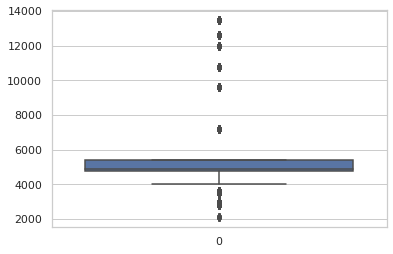

In [ ]:
# Detecting outliers on the loan principal

sns.boxplot(data=df['loan_principal'])

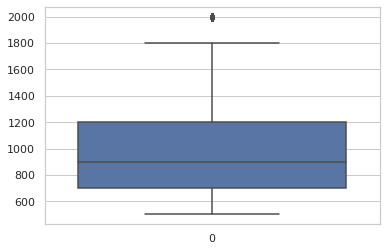

In [ ]:
# Detecting outliers on the down payment

sns.boxplot(data=df['down_payment'])

Text(0.5, 1.0, 'Number of individuals per product')

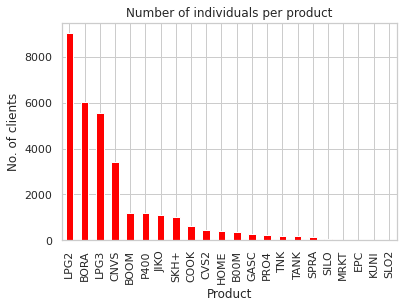

In [ ]:
# Field: product
df['product'].value_counts().plot(kind='bar',color='red')

# Labelling our x axis
plt.xlabel('Product')

# Labelling our y axis
plt.ylabel("No. of clients")

# Giving a title to our Bar chart
plt.title("Number of clients per product")

The product that has been acquired by most clients is 'LPG2' while the product with the smallest number of clients is SLO2.

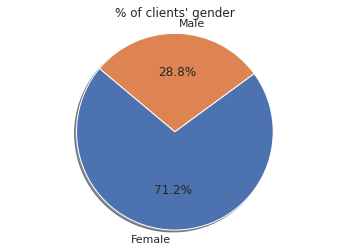

In [ ]:
# # Field: product
# df['gender'].value_counts().plot(kind='bar',color='red')

# # Labelling our x axis
# plt.xlabel('Gender')

# # Labelling our y axis
# plt.ylabel("No. of clients")

# # Giving a title to our Bar chart
# plt.title("Number of clients per gender")

gender = df.groupby('gender').count()

gender = gender['client_id']

labels = gender.index

# Plotting our pie chart
plt.pie(gender, explode=None, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title("% of clients' gender")

plt.show()


As part of their strategy, the group targets women. This can be seen in the number of women that have acquired their products.

Text(0.5, 1.0, 'Number of clients per Branch/Location')

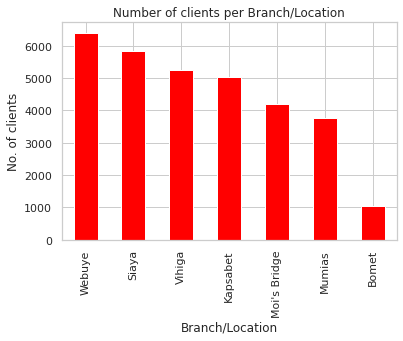

In [ ]:
# Branch

df['branch'].value_counts().plot(kind='bar',color='red')

# Labelling our x axis
plt.xlabel('Branch/Location')

# Labelling our y axis
plt.ylabel("No. of clients")

# Giving a title to our Bar chart
plt.title("Number of clients per Branch/Location")

Most of the products have been sold to clients in Webuye while Bomet holds the least number of clients.

Text(0.5, 1.0, "Distribution of clients' age")

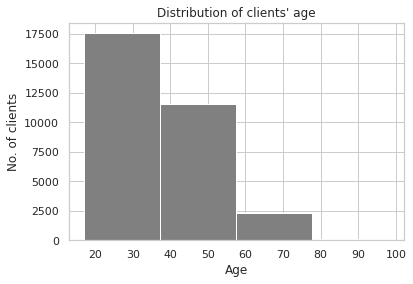

In [ ]:
# Age

num_bins = 4

plt.hist(df['age'], num_bins, histtype="bar", rwidth=2, color='grey')

# Labelling our x axis
plt.xlabel("Age")

# Labelling our y axis
plt.ylabel("No. of clients")

# Giving a title to our Bar chart
plt.title("Distribution of clients' age")

Most of the Bidhaa Bora clients are aged between 20 and 60 years.

Text(0.5, 1.0, 'Distribution of the number of days in arrears')

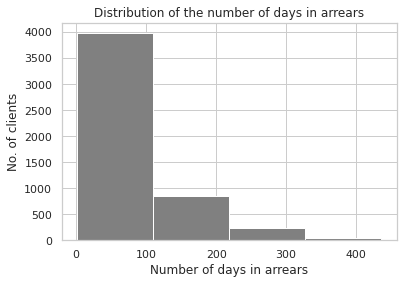

In [ ]:
# Number of days in arrears

num_bins = 4

plt.hist(df['days_in_arrears'], num_bins, histtype="bar", rwidth=2, color='grey')

# Labelling our x axis
plt.xlabel("Number of days in arrears")

# Labelling our y axis
plt.ylabel("No. of clients")

# Giving a title to our Bar chart
plt.title("Distribution of the number of days in arrears")

Most Bidhaa Bora loans are within the normal range of 0 to 100 number of days in arrears. The institution therefore runs a low risk of losing the money they have lend out to clients.

## 5. Bivariate Analysis

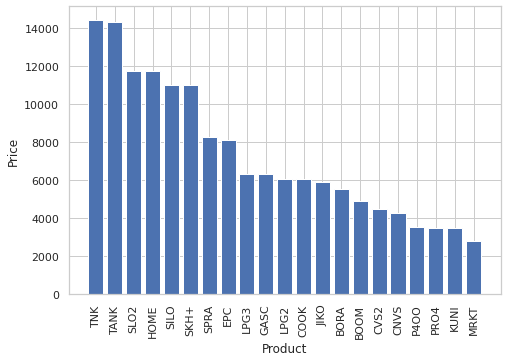

In [ ]:
# Price per product

# Grouping by product and obtaining the mean price foreach product
prices = df.groupby(['product'])
mean_price = prices.mean()
mean_price = mean_price.reset_index()

mean_price = mean_price.sort_values('total_amount', ascending = False).reset_index(drop=True)

# Plotting the average price per product
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(mean_price['product'],mean_price['total_amount'])
plt.xticks(rotation = 90)
plt.xlabel('Product')
plt.ylabel('Price')
plt.show()



In [ ]:
# Classifying the ages
# create a list of our conditions
conditions = [
    (df['age'] <= 20),
    (df['age'] > 20) & (df['age'] <=40),
    (df['age'] > 41) & (df['age'] <= 60),
    (df['age'] > 61)
    ]

# create a list of the values we want to assign for each condition
values = ['Less than 20 years', '21 to 40 years', '41 to 60 years','More than 60 years']

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_group'] = np.select(conditions, values)

# Grouping by age and obtaining the number of clients per age group
clients_per_age = df.groupby(['age_group'])

total_clients_per_age = clients_per_age.count()

total_clients_per_age = total_clients_per_age.reset_index()

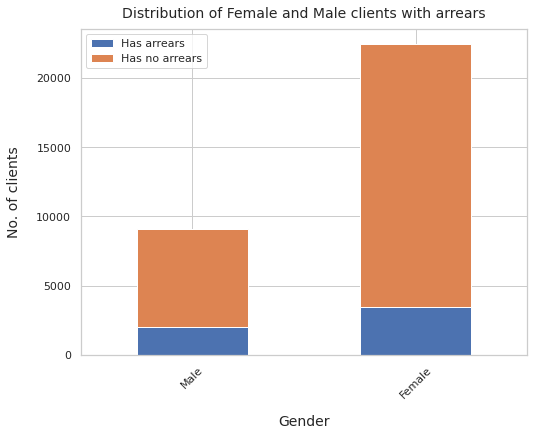

In [ ]:
# ****clients with arrears****
has_arrears= df[(df['status'] != 'Closed') & (df['status'] != 'Active')]

# Female clients with bank accounts
has_arrears_female = has_arrears[has_arrears['gender'] == 'Female']

# Male clients with bank accounts
has_arrears_male = has_arrears[has_arrears['gender'] == 'Male']

# Number of females with arrears
number_has_arrears_female = pd.DataFrame(has_arrears_female['gender'].value_counts())
number_has_arrears_female.columns = ['Has arrears']

# Number of males with arrears
number_has_arrears_male = pd.DataFrame(has_arrears_male['gender'].value_counts())
number_has_arrears_male.columns = ['Has arrears']

has_arrears_combined = pd.concat([number_has_arrears_male, number_has_arrears_female])
has_arrears_combined



# ****clients without arrears****
has_no_arrears= df[(df['status'] == 'Closed') | (df['status'] == 'Active')]

# Female clients with bank accounts
has_no_arrears_female = has_no_arrears[has_no_arrears['gender'] == 'Female']

# Male clients with bank accounts
has_no_arrears_male = has_no_arrears[has_no_arrears['gender'] == 'Male']

# Number of females with arrears
number_has_no_arrears_female = pd.DataFrame(has_no_arrears_female['gender'].value_counts())
number_has_no_arrears_female.columns = ['Has no arrears']

# Number of males with arrears
number_has_no_arrears_male = pd.DataFrame(has_no_arrears_male['gender'].value_counts())
number_has_no_arrears_male.columns = ['Has no arrears']

has_no_arrears_combined = pd.concat([number_has_no_arrears_female, number_has_no_arrears_male])

# merge the dataframes with and without bank accounts
has_arrears_combined['unique_identifier'] = has_arrears_combined.index
has_no_arrears_combined['unique_identifier'] = has_no_arrears_combined.index

full_arrears_dataset = has_arrears_combined.merge(has_no_arrears_combined , how='inner')
full_arrears_dataset.index = full_arrears_dataset['unique_identifier']

del full_arrears_dataset['unique_identifier']



# ****Stacked bar charts****
full_arrears_dataset[['Has arrears', 'Has no arrears']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of Female and Male clients with arrears", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("No. of clients", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Gender", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

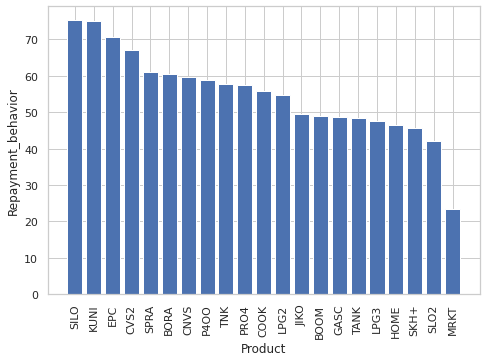

In [ ]:
# Repayment per product
# Grouping by product and obtaining the mean price foreach product
df['trp'] = df['trp'].str.replace('%','')
df['trp'] = df['trp'].astype(float)

repayment_behavior = df.groupby(['product'])
mean_repayment_behavior = repayment_behavior.mean()
mean_repayment_behavior = mean_repayment_behavior.reset_index()

mean_repayment_behavior = mean_repayment_behavior.sort_values('trp', ascending = False).reset_index(drop=True)

# Plotting the average price per product
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(mean_repayment_behavior['product'],mean_repayment_behavior['trp'])
plt.xticks(rotation = 90)
plt.xlabel('Product')
plt.ylabel('Repayment_behavior')
plt.show()

## 6. Multivariate Analysis

### Principal Component Analysis

In [ ]:
# replace whitespace with underscore
df.columns=df.columns.str.replace(' ','_')
# change to lowercases
df.columns=map(str.lower,df.columns)
# drop irrelevant columns
df.drop(['unnamed:_0','client_name','id_card','interest','principal','loan_frequency_2','interest.1'],axis = 1,inplace=True) 
df.head()

,client_id,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,fees,total_,prepayment,loan_officer,cycle,disbursed_date,installments,loan_frequency,status,trp,group_id,final_payment_date,arrear_amount,days_in_arrears
0,0008-0056-17323,1/1/1965,Female,18876,Vihiga,BORA,"4,900.00",700,"5,600.00",0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,71.40%,17073,8/3/2019,0,NaN
1,0008-0056-17324,5/15/1953,Female,18877,Vihiga,BORA,"4,900.00",700,"5,600.00",0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,100%,17073,3/12/2019,0,NaN
2,0008-0056-17326,1/1/1954,Female,18879,Vihiga,BORA,"4,900.00",700,"5,600.00",0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,14.30%,17073,8/8/2019,0,NaN
3,0008-0056-17327,12/30/1986,Female,18880,Vihiga,BORA,"4,900.00",700,"5,600.00",0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,14.30%,17073,8/8/2019,0,NaN
4,0008-0056-17328,1/2/1978,Male,18881,Vihiga,BORA,"4,900.00",700,"5,600.00",0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,100%,17073,8/1/2019,0,NaN


In [ ]:
# Remove commas and Percentage in the values
df.replace(',','', regex=True, inplace=True)
df.replace('%','', regex=True, inplace=True)

# renaming columns 
df.rename(columns={'trp':'trp_in_percentage'},inplace=True)
df['group_id'].replace({'Failed Formation Meeting': '9737'}, inplace=True)
df.head(2)

,client_id,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,fees,total_,prepayment,loan_officer,cycle,disbursed_date,installments,loan_frequency,status,trp_in_percentage,group_id,final_payment_date,arrear_amount,days_in_arrears
0,0008-0056-17323,1/1/1965,Female,18876,Vihiga,BORA,4900.00,700,5600.00,0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,71.40,17073,8/3/2019,0,NaN
1,0008-0056-17324,5/15/1953,Female,18877,Vihiga,BORA,4900.00,700,5600.00,0,0,0,Anthony,1.0,1/9/2019,7,1,Closed,100,17073,3/12/2019,0,NaN


In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['gender']= le.fit_transform(df['gender']) 
df['branch']= le.fit_transform(df['branch']) 
df['product']= le.fit_transform(df['product']) 
df['loan_officer']= le.fit_transform(df['loan_officer']) 

df.head()

,client_id,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,fees,total_,prepayment,loan_officer,cycle,disbursed_date,installments,loan_frequency,status,trp_in_percentage,group_id,final_payment_date,arrear_amount,days_in_arrears
0,0008-0056-17323,1/1/1965,0,18876,5,2,4900.00,700,5600.00,0,0,0,1,1.0,1/9/2019,7,1,Closed,71.40,17073,8/3/2019,0,NaN
1,0008-0056-17324,5/15/1953,0,18877,5,2,4900.00,700,5600.00,0,0,0,1,1.0,1/9/2019,7,1,Closed,100,17073,3/12/2019,0,NaN
2,0008-0056-17326,1/1/1954,0,18879,5,2,4900.00,700,5600.00,0,0,0,1,1.0,1/9/2019,7,1,Closed,14.30,17073,8/8/2019,0,NaN
3,0008-0056-17327,12/30/1986,0,18880,5,2,4900.00,700,5600.00,0,0,0,1,1.0,1/9/2019,7,1,Closed,14.30,17073,8/8/2019,0,NaN
4,0008-0056-17328,1/2/1978,1,18881,5,2,4900.00,700,5600.00,0,0,0,1,1.0,1/9/2019,7,1,Closed,100,17073,8/1/2019,0,NaN


In [ ]:
df.isnull().sum()

client_id                 0
dob                      12
gender                    0
account                   0
branch                    0
product                   0
loan_principal            0
down_payment              0
total_amount              0
fees                      0
total_                    0
prepayment                0
loan_officer              0
cycle                   693
disbursed_date            0
installments              0
loan_frequency            0
status                    0
trp_in_percentage         0
group_id                  0
final_payment_date     6235
arrear_amount             1
days_in_arrears       20959
dtype: int64

In [ ]:
# replacing na values in days_in_arrears with 0 
df["days_in_arrears"].fillna(0, inplace = True) 
# 
# replace null with forward filling
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

client_id             0
dob                   0
gender                0
account               0
branch                0
product               0
loan_principal        0
down_payment          0
total_amount          0
fees                  0
total_                0
prepayment            0
loan_officer          0
cycle                 0
disbursed_date        0
installments          0
loan_frequency        0
status                0
trp_in_percentage     0
group_id              0
final_payment_date    0
arrear_amount         0
days_in_arrears       0
dtype: int64

In [ ]:
#  Preprocessing

# 
X = df.drop(['final_payment_date','dob','disbursed_date','client_id','status','group_id','loan_frequency'], 1)
y = df['status']

In [ ]:
# Preprocessing
# 
# 
# X = df.drop(['client_id','dob','gender','account','branch','product','loan_officer','disbursed_date','final_payment_date','loan_frequency_2','status'], 1)
# y = df['gender']
X = thelist.drop(['product'], 1)
y = thelist['product']

In [ ]:
#Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
# PCA performs best with a normalized feature set. 
# standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# 
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([2.27245350e-01, 1.50247278e-01, 1.14560578e-01, 8.12286650e-02,
       6.98548412e-02, 6.87613901e-02, 6.12648161e-02, 6.05105699e-02,
       5.61928359e-02, 4.82563827e-02, 2.49483211e-02, 2.10514919e-02,
       1.14756239e-02, 4.40185640e-03, 9.34296759e-33, 1.34043458e-34])

In [ ]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 
# resulting in 93.33% accuracy.

[[   0  303  141    0    0]
 [   0 3506  152    0    0]
 [   0  252  560    0    0]
 [   0    0    1    0    0]
 [   0   16   55    0    0]]
Accuracy 0.8154833533894906


## 7. Hypothesis Testing

### Specifying the Hypotheses

      Null hypothesis : Defualting a loan has no relation to age strata

      Alternative Hypothesis: There is a significant relations between defaulting the loan and age strata



> The sampling technique is stratified sampling

In [26]:
df.columns

Index(['dob', 'gender', 'account', 'branch', 'product', 'loan_principal',
       'down_payment', 'total_amount', 'principal', 'total_', 'prepayment',
       'loan_officer', 'cycle', 'disbursed_date', 'installments', 'status',
       'trp', 'group_id', 'arrear_amount', 'age_at_disbursement'],
      dtype='object')

In [27]:
# Creating age brackets
conditions2 = [
    (df['age_at_disbursement'] <= 30),
    (df['age_at_disbursement'] >= 30)]
values2 = ['Below 30', 'Above 30']
df['New_Age_Strata'] = np.select(conditions2, values2)
df.head()

,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,principal,total_,prepayment,loan_officer,cycle,disbursed_date,installments,status,trp,group_id,arrear_amount,age_at_disbursement,New_Age_Strata
0,1965-01-01,Female,18876,Vihiga,BORA,4900.0,700.0,5600.0,0,0,0,Anthony,1.0,2019-01-09,7,Closed,71.40%,17073,0,54.0,Above 30
1,1953-05-15,Female,18877,Vihiga,BORA,4900.0,700.0,5600.0,0,0,0,Anthony,1.0,2019-01-09,7,Closed,100%,17073,0,66.0,Above 30
2,1954-01-01,Female,18879,Vihiga,BORA,4900.0,700.0,5600.0,0,0,0,Anthony,1.0,2019-01-09,7,Closed,14.30%,17073,0,65.0,Above 30
3,1986-12-30,Female,18880,Vihiga,BORA,4900.0,700.0,5600.0,0,0,0,Anthony,1.0,2019-01-09,7,Closed,14.30%,17073,0,33.0,Above 30
4,1978-01-02,Male,18881,Vihiga,BORA,4900.0,700.0,5600.0,0,0,0,Anthony,1.0,2019-01-09,7,Closed,100%,17073,0,41.0,Above 30


In [28]:
# Sampling
sample = df.groupby('New_Age_Strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the stratified sample
print(sample['New_Age_Strata'].value_counts())

Above 30    2223
Below 30     837
Name: New_Age_Strata, dtype: int64


In [29]:
# Picking out the samples
above_30 = sample[(sample['New_Age_Strata'] == 'Above 30')]
below_30 = sample[(sample['New_Age_Strata'] == 'Below 30')]

In [30]:
# Crosstab
data_crosstab = pd.crosstab(sample['New_Age_Strata'], df['status'],  margins = False)
data_crosstab

status,Active,Closed,Overdue,Written Off
New_Age_Strata,,,,
Above 30,516,1389,297,21
Below 30,179,461,180,17


In [31]:
# defining the table
alpha = 0.05
chi_data = data_crosstab.values 
stat, p, dof, expected = chi2_contingency(chi_data) 
  
# interpreting the p-value 
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')


p value is 2.737568153439515e-08
Dependent (reject H0)


**Findings**
* The null hypothesis has been rejected.
* Defaulting does not depend on the age strata
* Further statistical analysis should be conducted to asceratin factors that affect defaulting 

## 8. Challenging the solution 

In [34]:
# we will conduct a different test on the same hypothesis 
data_crosstab

status,Active,Closed,Overdue,Written Off
New_Age_Strata,,,,
Above 30,516,1389,297,21
Below 30,179,461,180,17


In [38]:
# We will look for the probability that someone below 30 has an overdue account 
# p = 180 / 477
#We will try 30 times
# n= 30 
# x = 1
stats.binom_test(1,n=30,p=180/477,alternative='greater')

0.9999993283514086

Findings 
The probability of someone below the age of 30 having an overdue account is very likely.Hence we can see that the previous hypothesis was right. 

## 9. Further Analysis




In [ ]:
df.head(1)

,client_id,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,fees,total_,prepayment,loan_officer,cycle,disbursed_date,installments,loan_frequency,status,trp_in_percentage,group_id,final_payment_date,arrear_amount,days_in_arrears
0,0008-0056-17323,1965-01-01,Female,18876,Vihiga,BORA,4900.00,700,5600.00,0,0,0,Anthony,1.0,2019-01-09,7,1,Closed,71.40,17073,2019-08-03,0,0.0


### Is there any correlation between the age of the client and choice of the product bought ? 

In [ ]:
df['product'].replace('B00M',0, inplace=True)
df['product'].replace('BOOM',1,inplace=True)
df['product'].replace('BORA',2,inplace=True)
df['product'].replace('CNVS',3,inplace=True)
df['product'].replace('COOK',4,inplace=True)
df['product'].replace('CVS2',5,inplace=True)
df['product'].replace('EPC',6,inplace=True)
df['product'].replace('GASC',7,inplace=True)
df['product'].replace('HOME',8,inplace=True)
df['product'].replace('JIKO',9,inplace=True)
df['product'].replace('KUNI',10 ,inplace=True)
df['product'].replace('LPG2',11,inplace=True)
df['product'].replace('LPG3',12,inplace=True)
df['product'].replace('MRKT',13,inplace=True)
df['product'].replace('P400',14,inplace=True)
df['product'].replace('PRO4',15,inplace=True)
df['product'].replace('SILO',16,inplace=True)
df['product'].replace('SKH+',17,inplace=True) 
df['product'].replace('SLO2',18,inplace=True)
df['product'].replace('SPRA',19,inplace=True)
df['product'].replace('TANK',20,inplace=True)
df['product'].replace('TNK',21,inplace=True)

In [ ]:
import datetime
df['age'] = 2019 - pd.DatetimeIndex(df['dob']).year
#df['age'] = pd.to_numeric(df['age'])

array([54., 66., 65., 33., 41., 37., 73., 30., 22., 43., 57., 63., 46.,
       42., 44., 47., 36., 35., 28., 23., 34., 60., 49., 27., 39., 31.,
       32., 29., 67., 20., 26., 55., 77., 56., 40., 38., 45., 19., 58.,
       62., 69., 59., 21., 48., 25., 24., 71., 53., 51., 50., 95., 52.,
       64., 61., 75., 70., 81., 18., 76., 68., 79., 80., 74., 85., 72.,
       87., 88., 89., 84., 83., nan, 90., 78., 82., 86., 92., 91., 98.,
       17., 94.])

In [ ]:
df['age'].corr(df['product'])

-0.06880265590726449

In [ ]:
# Conditions
conditions = [
    (df['age'] >= 0) & (df['age'] <= 20),
    (df['age'] >= 21) & (df['age'] <= 40),
    (df['age'] >= 41) & (df['age'] <= 120)
    ]

# Values
values = ['0 - 20 yrs', '21 - 40 yrs', 'Over 40 yrs']

# age_bracket column
df['age_bracket'] = np.select(conditions, values)


In [ ]:
df

### Is there any correlation between the gender of the client and the choice of the product bought ? 

In [ ]:
df.head(1)

,client_id,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,fees,total_,prepayment,loan_officer,cycle,disbursed_date,installments,loan_frequency,status,trp,group_id,final_payment_date,arrear_amount,days_in_arrears
0,0008-0056-17323,1965-01-01,Female,18876,Vihiga,2,4900.00,700,5600.00,0,0,0,Anthony,1.0,2019-01-09,7,1,Closed,71.40%,17073,2019-08-03,0,NaN


In [ ]:
df['gender'].replace('Female',0,inplace=True)
df['gender'].replace('Male',1,inplace=True)

In [ ]:
df['gender'].corr(df['product'])

0.11400416218732867

### Is there any correlation between repayment behaviour(measured using TRP) and choice of the product bought? 

In [ ]:
df['trp_in_percentage'] = df['trp_in_percentage'].astype(float)

In [ ]:
df['trp_in_percentage'].corr(df['product'])

-0.07630517533017253

### How long do clients take to fully pay their loans ? 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31516 entries, 0 to 31515
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   client_id           31516 non-null  object         
 1   dob                 31502 non-null  datetime64[ns] 
 2   gender              31516 non-null  object         
 3   account             31516 non-null  int64          
 4   branch              31516 non-null  object         
 5   product             31516 non-null  int64          
 6   loan_principal      31516 non-null  object         
 7   down_payment        31516 non-null  object         
 8   total_amount        31516 non-null  object         
 9   fees                31516 non-null  int64          
 10  total_              31516 non-null  object         
 11  prepayment          31516 non-null  object         
 12  loan_officer        31516 non-null  object         
 13  cycle               30823 non-n

In [ ]:
df['final_payment_date'] = pd.to_datetime(df['final_payment_date'])

In [ ]:
difference = (df['disbursed_date']-df['final_payment_date'])
difference.mean()

Timedelta('-162 days +22:24:45.738648476')

### What is the distribution of the data



In [ ]:
df.head(1)

,client_id,dob,gender,account,branch,product,loan_principal,down_payment,total_amount,fees,total_,prepayment,loan_officer,cycle,disbursed_date,installments,loan_frequency,status,trp_in_percentage,group_id,final_payment_date,arrear_amount,days_in_arrears
0,0008-0056-17323,1965-01-01,0,18876,6,2,4900.00,700,5600.00,0,0,0,Anthony,1.0,2019-01-09,7,1,Closed,71.4,17073,2019-08-03,0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


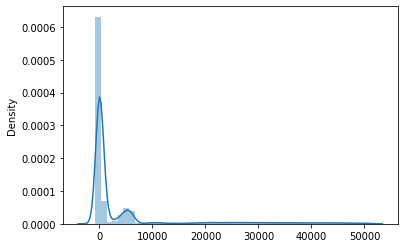

In [ ]:
thelist = df.drop(['dob','disbursed_date','final_payment_date','client_id','status','loan_officer'],axis=1)
sns.distplot(thelist)

## 10. Follow up Questions 
Claire

### Did we have the right data 

Yes we had the right data because it had all the columns we needed to meet our objectives. 

### Do we need other data to answer this question 

The dataset we had was sufficient enough to meet our objectives and answer some of the questions we had regarding the data. 

### Do we have the right question 